In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read dataset
df=pd.read_csv("hotel_booking5.csv")

In [3]:
#to display all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [30]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
#total amount of rows and colunms

total_rows=len(df.axes[0])

print("total rows", total_rows )


total_cols=len(df.axes[1])

print("total columns", total_cols )

total rows 9998
total columns 32


In [6]:
#columns 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
#datatypes
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### 1 Comparing adults and number of meals

#### pivot table for meal and no of adults

In [32]:
adultmeals=pd.pivot_table(df, index="meal",values="adults",aggfunc='count')

In [33]:
adultmeals

,adults
meal,
BB,7131
FB,421
HB,2098
SC,22
Undefined,326


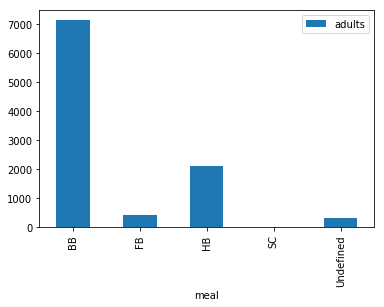

In [27]:
adultmeals.plot(kind="bar")

#### or

<BarContainer object of 5 artists>

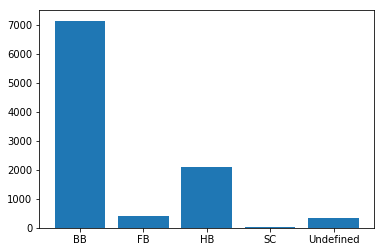

In [28]:
plt.bar(adultmeals.index,adultmeals["adults"])

### 2. in what country is the total of special request the highest for transient customer type?

#### customer type vs total special  request

In [18]:
#pivot table for customer request
customerrequests=pd.pivot_table(df, index="customer_type",values="total_of_special_requests",aggfunc='count')

In [19]:
customerrequests

,total_of_special_requests
customer_type,
Contract,331
Group,28
Transient,7458
Transient-Party,2181


#### country, customer type  vs total special request¶

In [20]:
#create pivot table with country and specifying columns of customer type
customerrequestscountrys=pd.pivot_table(df, index="country",columns="customer_type",values="total_of_special_requests",aggfunc='count')

In [21]:
customerrequestscountrys

customer_type,Contract,Group,Transient,Transient-Party
country,,,,
AGO,NaN,NaN,1.0,NaN
ALB,NaN,NaN,2.0,NaN
AND,NaN,NaN,1.0,NaN
ARE,NaN,NaN,4.0,NaN
ARG,NaN,NaN,13.0,1.0
AUS,NaN,NaN,8.0,2.0
AUT,1.0,NaN,13.0,25.0
BEL,NaN,1.0,35.0,26.0
BLR,NaN,NaN,4.0,NaN


#### to remove NAN values from contract column (optional)

In [22]:
customerrequestscountry1=customerrequestscountrys[customerrequestscountrys.Contract>0]
customerrequestscountry1

customer_type,Contract,Group,Transient,Transient-Party
country,,,,
AUT,1.0,NaN,13.0,25.0
DEU,3.0,NaN,128.0,205.0
ESP,9.0,NaN,687.0,212.0
FIN,1.0,NaN,16.0,NaN
FRA,1.0,NaN,155.0,50.0
GBR,181.0,1.0,699.0,373.0
IRL,20.0,1.0,318.0,40.0
ITA,2.0,NaN,45.0,9.0
NLD,3.0,NaN,64.0,18.0


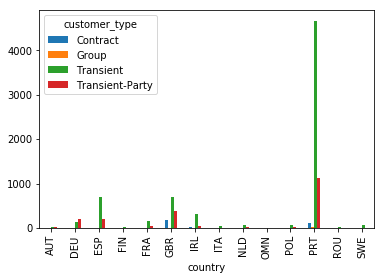

In [23]:
#to view all 4 custmoer types
customerrequestscountry1.plot(kind="bar")

#### to plot transient customer type vs total special request

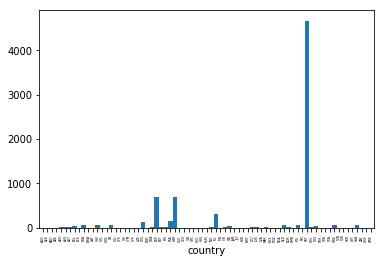

In [47]:
#to plot transient vs customerrequestscountrys

customerrequestscountrys.index,customerrequestscountrys.Transient.plot(kind="bar", width=1)
plt.tick_params(axis='x', which='major', labelsize=3)

#### to sort it

In [35]:
sortedcountrytransients= customerrequestscountrys.Transient.sort_values()

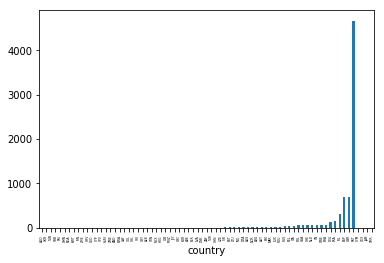

In [51]:
customerrequestscountrys.index,sortedcountrytransients.plot(kind="bar")
plt.tick_params(axis='x', which='major', labelsize=3)

### 3 number of adults that had no deposit in each month

In [24]:
df['deposit_type'].value_counts()

No Deposit    8929
Non Refund     998
Refundable      71
Name: deposit_type, dtype: int64

In [25]:
#create pivot table with condition
depositadult=pd.pivot_table(df[df['deposit_type']=='No Deposit'],index='arrival_date_month',values="adults",aggfunc='count')

In [26]:
depositadult

,adults
arrival_date_month,
April,459
August,1252
December,692
February,332
January,302
July,1347
June,431
March,389
May,708


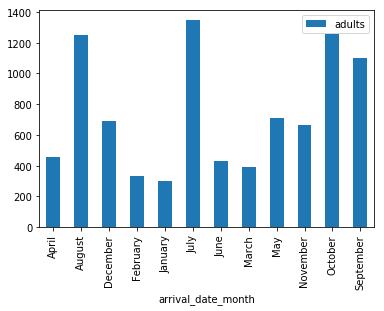

In [27]:
depositadult.plot(kind="bar")

### 4 number of required parking spaces in july 

In [44]:
julyparkingspaces=pd.pivot_table(df[df['arrival_date_month']=='July'],index='arrival_date_month',values="required_car_parking_spaces",aggfunc='count')

In [45]:
julyparkingspaces

,required_car_parking_spaces
arrival_date_month,
July,1347


### 5 number of agents from Norway

In [28]:
agentsportugal=pd.pivot_table(df[df['country']=='NOR'],index='country',values="agent",aggfunc='count')

In [29]:
agentsportugal

,agent
country,
NOR,10
